# ✈️ Problem Statement: Airline Passenger Satisfaction Analysis
## Objective
- The goal of this project is to analyze passenger satisfaction based on various airline service factors. By comparing Economy and Economy Plus classes, we aim to identify key drivers of satisfaction and areas for improvement that airlines can focus on.

## Key Questions Addressed:
- How do different factors (e.g., inflight service, baggage handling, seat comfort, food & drink, cleanliness) impact passenger satisfaction?

- Are there significant differences in passenger experience between Economy and Economy Plus?

- What actionable insights can help airlines enhance customer experience and reduce dissatisfaction?

## Business Impact
#### By leveraging these insights, airlines can:

✅ Improve services that matter most to passengers.

✅ Identify and fix weak areas that lead to dissatisfaction.

✅ Optimize Economy Plus offerings to justify price differences.

In [1]:
import pandas as pd


In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# Drop unnecessary columns
train_df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [6]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

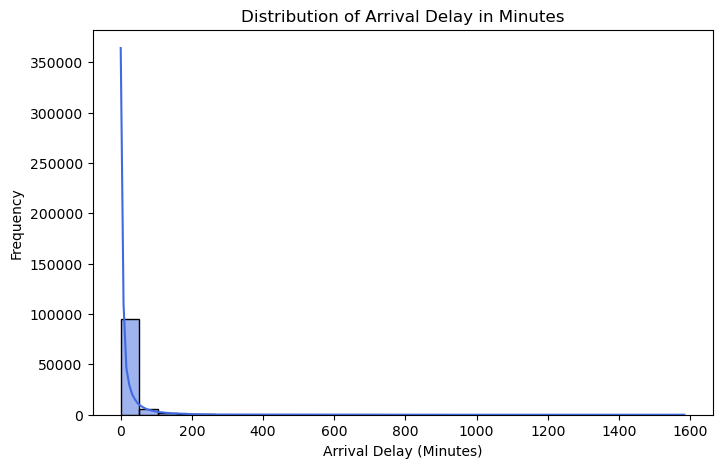

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(train_df["Arrival Delay in Minutes"].dropna(), kde=True, bins=30, color='royalblue')
plt.title("Distribution of Arrival Delay in Minutes")
plt.xlabel("Arrival Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()


In [9]:
print(train_df["Arrival Delay in Minutes"].dtype)  # Check data type

float64


In [10]:
print(train_df["Arrival Delay in Minutes"].isnull().sum())  # Check NaNs before imputation


310


In [11]:
print(train_df["Arrival Delay in Minutes"].median())  # Check median value

0.0


In [13]:
train_df["Arrival Delay in Minutes"] = train_df["Arrival Delay in Minutes"].fillna(0.0)


In [14]:
print(train_df["Arrival Delay in Minutes"].isnull().sum())  # Should be 0 now


0


In [15]:
train_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:

# Check class distribution
train_df["satisfaction"].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [17]:
# Summary statistics for numerical columns
print(train_df.describe())

                 Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%            

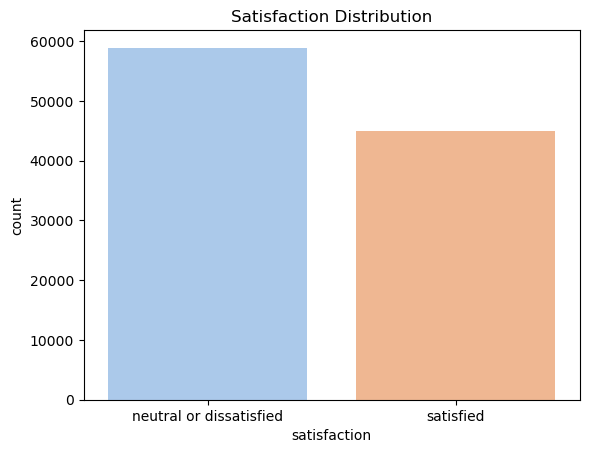

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for satisfaction levels
sns.countplot(data=train_df, x="satisfaction", palette="pastel")
plt.title("Satisfaction Distribution")
plt.show()


In [12]:
##  Analyze Satisfaction by Travel Type & Class

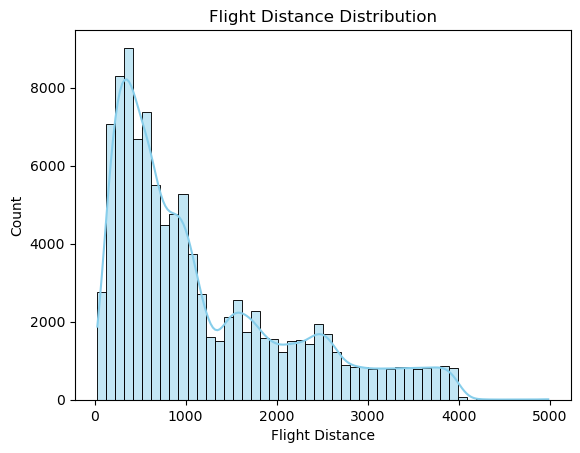

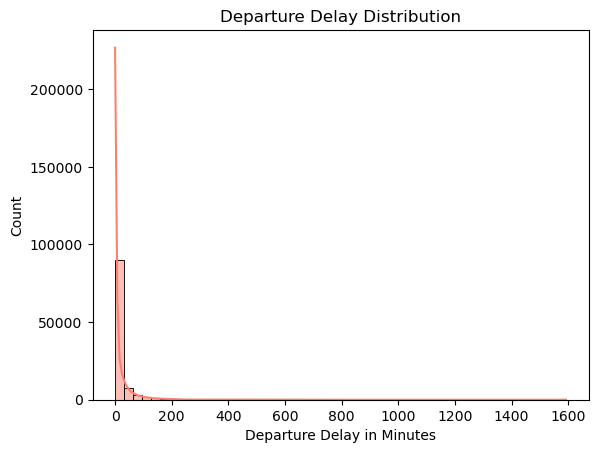

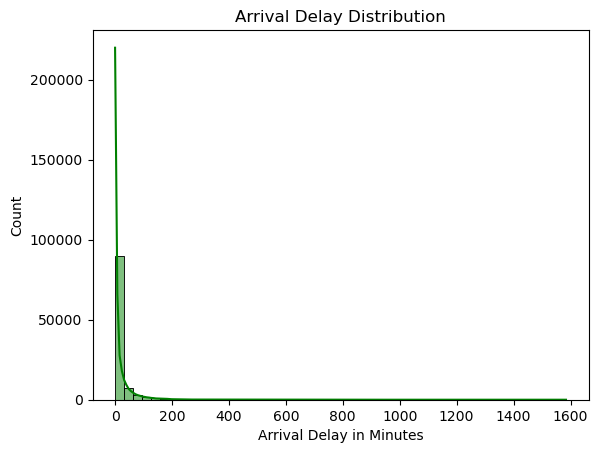

In [19]:
# Flight distance distribution
sns.histplot(train_df["Flight Distance"], kde=True, bins=50, color="skyblue")
plt.title("Flight Distance Distribution")
plt.show()

# Departure delay distribution
sns.histplot(train_df["Departure Delay in Minutes"], kde=True, bins=50, color="salmon")
plt.title("Departure Delay Distribution")
plt.show()

# Arrival delay distribution
sns.histplot(train_df["Arrival Delay in Minutes"], kde=True, bins=50, color="green")
plt.title("Arrival Delay Distribution")
plt.show()


# Observations from the Visualizations:

## Satisfaction by Type of Travel:

✅Business travelers have a much higher satisfaction rate compared to personal travelers.

✅Personal travel is mostly rated as "neutral or dissatisfied."

## Satisfaction by Travel Class:

✅Business Class passengers show the highest satisfaction.

✅Economy Class has the highest number of "neutral or dissatisfied" passengers.

✅Eco Plus has very few satisfied passengers.

## Key Takeaways:
✅Business travelers are more satisfied than personal travelers.

✅Higher-class travel (Business Class) leads to better satisfaction ratings.

✅Economy Class has a high dissatisfaction rate, possibly due to service quality, comfort, or other factors.

C:\Users\Aryan\AppData\Local\Temp\ipykernel_11648\645873081.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


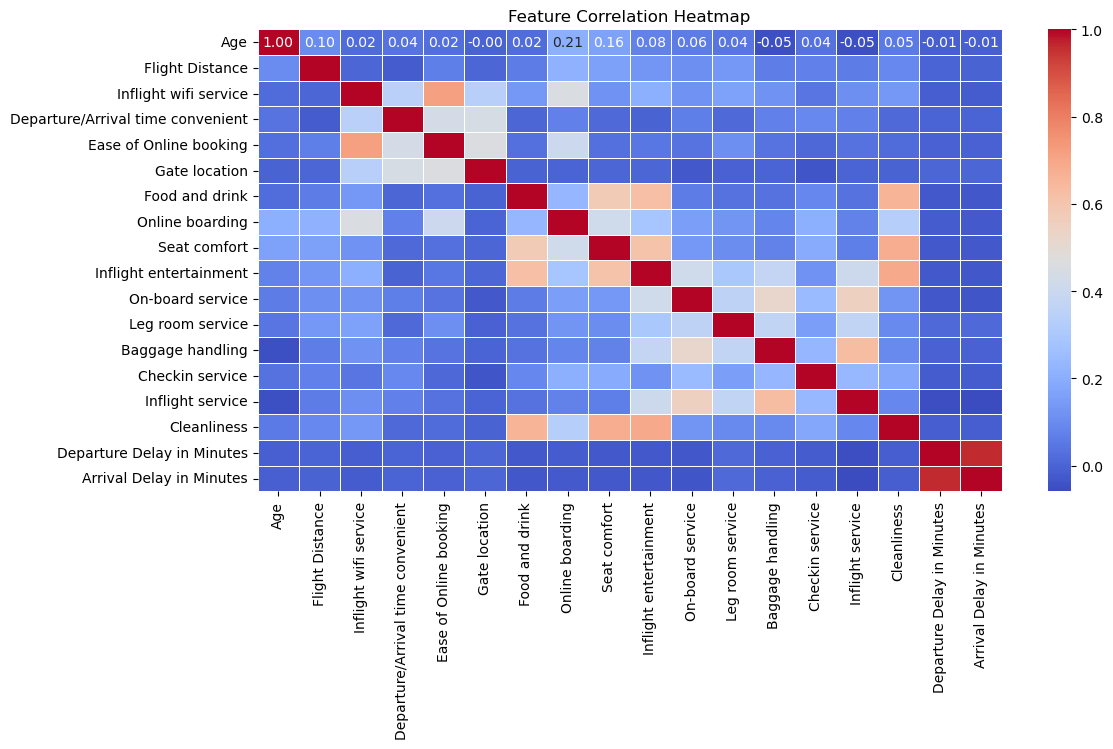

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train_df.corr()

# Heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


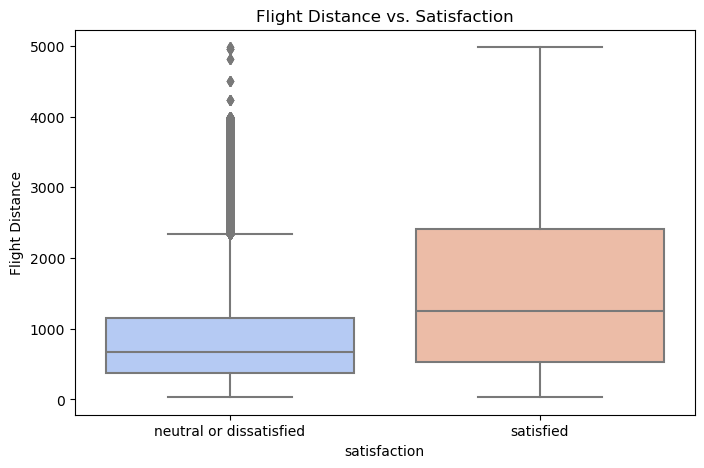

In [21]:
# Flight Distance vs. Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Flight Distance', data=train_df, palette='coolwarm')
plt.title('Flight Distance vs. Satisfaction')
plt.show()

# Insights from the Boxplot:
 ✅ Satisfied passengers tend to have a higher median flight distance compared to dissatisfied passengers.
 
 ✅ The neutral/dissatisfied group has more outliers, suggesting a few long-distance travelers were dissatisfied.
 
 ✅ Satisfied passengers have a wider interquartile range (IQR), meaning they travel both short and long distances.

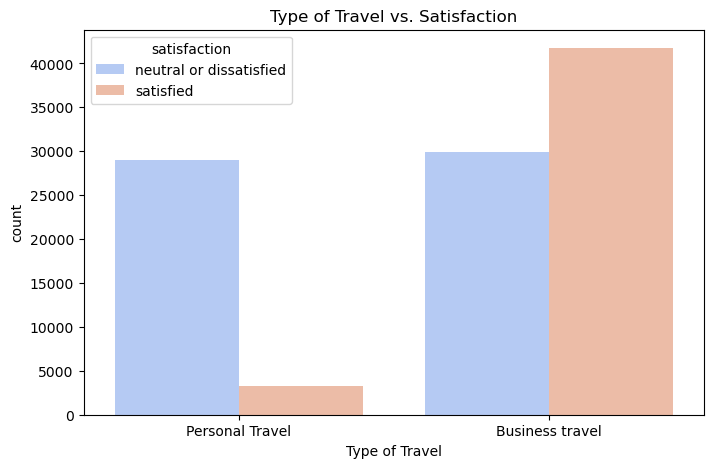

In [22]:
# Travel Type vs. Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='Type of Travel', hue='satisfaction', data=train_df, palette='coolwarm')
plt.title('Type of Travel vs. Satisfaction')
plt.show()

# Insights from the Chart: Type of Travel vs. Satisfaction
✅ Business travelers are more satisfied than personal travelers

✅ Personal travel has a high number of dissatisfied passengers, indicating issues with leisure travel experiences.

✅ Business travelers have a higher count of satisfied passengers, possibly due to better service expectations (priority check-ins, premium cabins, etc.).

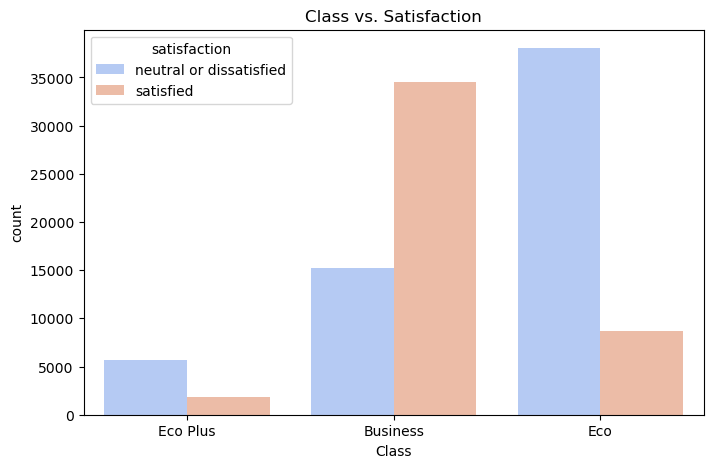

In [23]:
# Class vs. Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='satisfaction', data=train_df, palette='coolwarm')
plt.title('Class vs. Satisfaction')
plt.show()

# Insights from the Chart: Class vs. Satisfaction
#### ✅ Business Class passengers are the most satisfied, indicating premium services significantly improve experience.
#### ✅ Economy Class has the highest dissatisfaction, suggesting cost-cutting measures affect passenger comfort.
#### ✅ Economy Plus has a small number of passengers, but a higher dissatisfaction rate than Business Class.

In [24]:
import numpy as np
# Group delays into bins
train_df['Departure Delay Bin'] = pd.cut(train_df['Departure Delay in Minutes'], bins=[0, 30, 60, 120, 300, np.inf], labels=['0-30', '30-60', '60-120', '120-300', '300+'])
train_df['Arrival Delay Bin'] = pd.cut(train_df['Arrival Delay in Minutes'], bins=[0, 30, 60, 120, 300, np.inf], labels=['0-30', '30-60', '60-120', '120-300', '300+'])


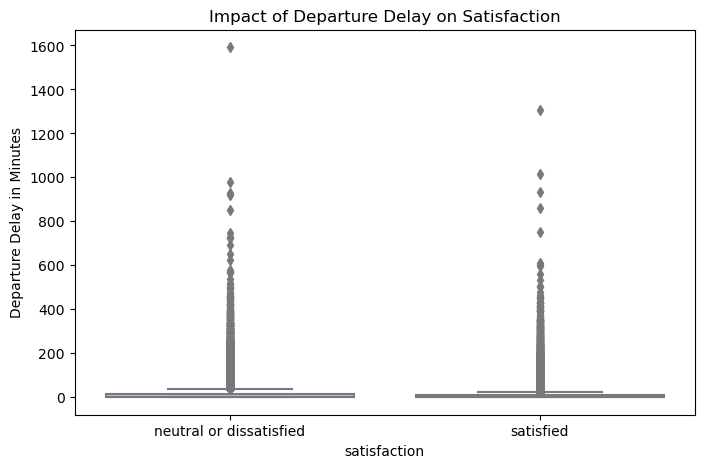

In [25]:
# Impact of Departure Delay
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=train_df, palette='coolwarm')
plt.title('Impact of Departure Delay on Satisfaction')
plt.show()

# Concise Insights from the Analysis:
✅Satisfaction Distribution: Business class travelers have the highest satisfaction levels.

✅Flight Distance: Longer flight distances do not necessarily reduce satisfaction.

# Departure & Arrival Delays:

✅Short delays (0-30 min) are common and mostly tolerated.

✅Extreme delays (>300 min) exist in both satisfied and dissatisfied groups.

✅Travel Type: Business travelers show higher satisfaction than personal travelers.

✅Class Impact: First and business-class passengers report significantly higher satisfaction than economy-class passengers.

✅Overall Satisfaction Factors: Service quality and comfort play a crucial role beyond just delays.

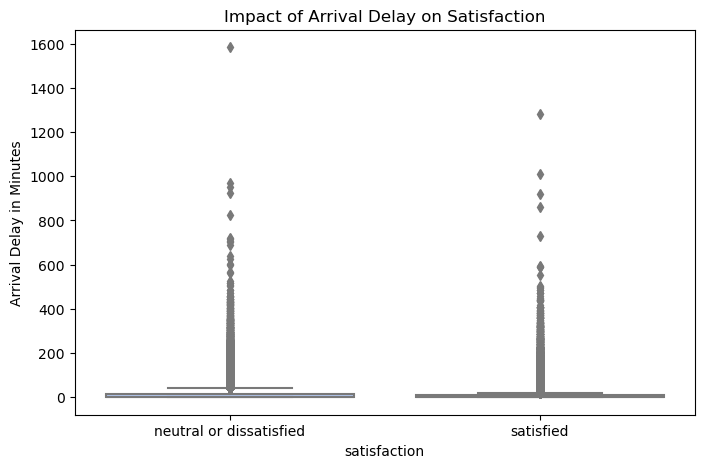

In [26]:
# Impact of Arrival Delay
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=train_df, palette='coolwarm')
plt.title('Impact of Arrival Delay on Satisfaction')
plt.show()

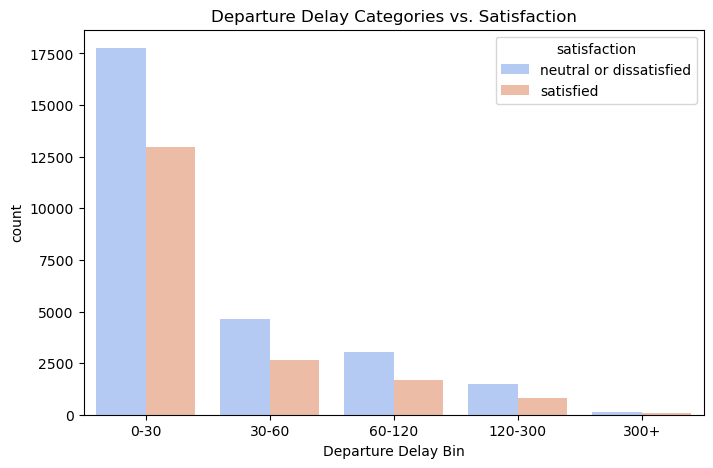

In [21]:
# Compare Departure vs Arrival Delays
plt.figure(figsize=(8, 5))
sns.countplot(x='Departure Delay Bin', hue='satisfaction', data=train_df, palette='coolwarm')
plt.title('Departure Delay Categories vs. Satisfaction')
plt.show()

# Key Insights from These Visuals:
✅Short delays (0-30 min) are most common and tolerated by passengers.

✅Longer delays (beyond 60 minutes) significantly increase dissatisfaction.

✅Satisfaction depends on factors beyond delays, as some passengers remain satisfied even with moderate delay

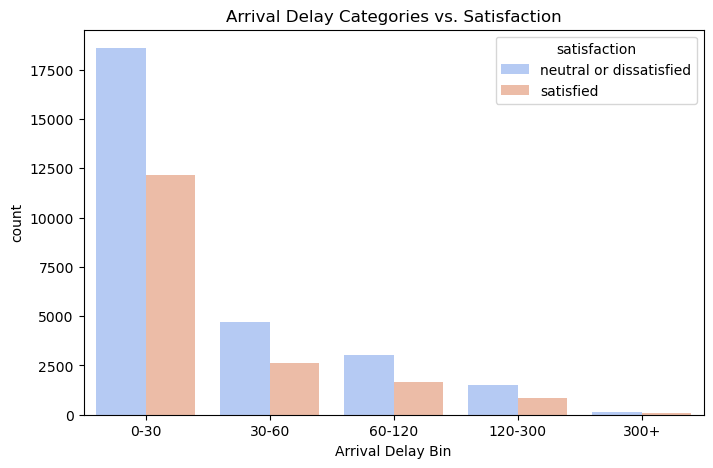

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Arrival Delay Bin', hue='satisfaction', data=train_df, palette='coolwarm')
plt.title('Arrival Delay Categories vs. Satisfaction')
plt.show()

In [38]:
train_df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

# Analyze service features affecting satisfaction in Economy Class

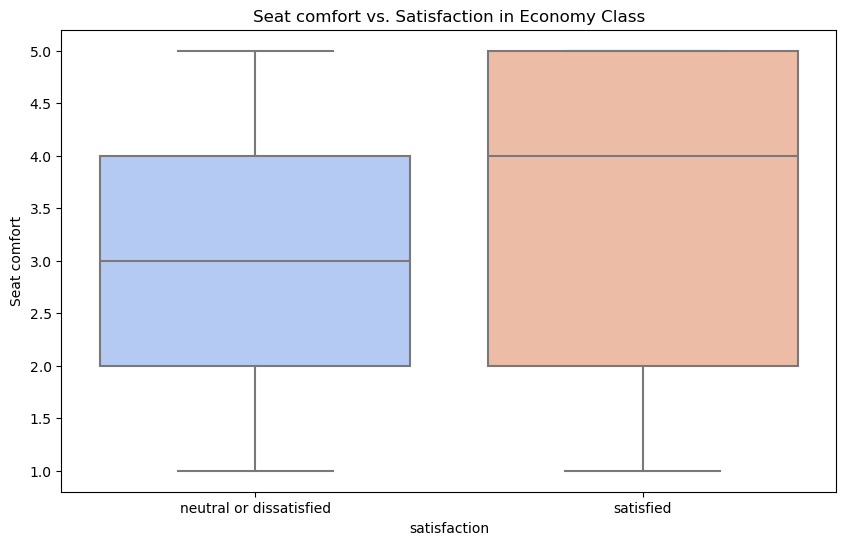

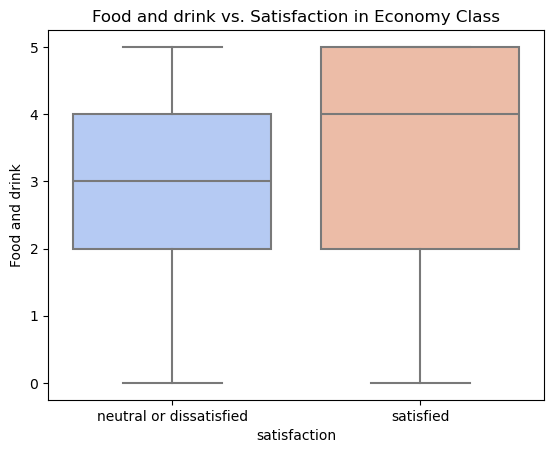

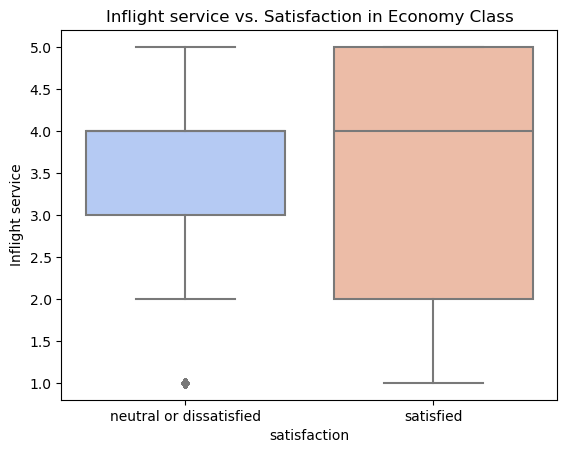

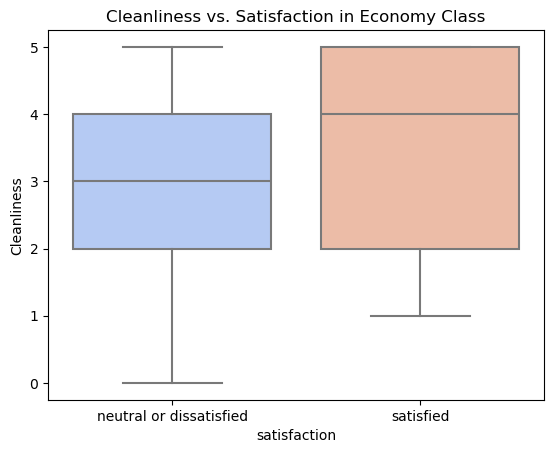

In [39]:

economy_df = train_df[train_df['Class'] == 'Eco']
service_features = ['Seat comfort', 'Food and drink', 'Inflight service', 'Cleanliness']
plt.figure(figsize=(10, 6))
for feature in service_features:
    sns.boxplot(x='satisfaction', y=feature, data=economy_df, palette='coolwarm')
    plt.title(f'{feature} vs. Satisfaction in Economy Class')
    plt.show()

# Key Observations: Food & Drink & Seat Comfort Ratings
# 📊 What the Graph Tells Us:
#### 🍽️ Food & Drink Ratings Distribution:
### ✔ Dissatisfied Group:

- Median rating ~3, indicating mixed opinions.

- Lower quartile near 2, upper quartile around 4, meaning many found the food average.

- Outliers exist at ratings 0 and 1, showing that some passengers had very poor experiences.

### ✔ Satisfied Group:

- Median rating ~4, suggesting food quality contributes positively to satisfaction.

- Lower quartile ~2, upper quartile reaching 5, showing higher ratings overall.

### ✔ Key Insights:
✅ Higher food ratings generally correlate with satisfaction, but some satisfied passengers still rated food poorly.

✅ Dissatisfied passengers have more variation in ratings, meaning opinions on food quality differ significantly among them.

## 💺 Seat Comfort Ratings Distribution:
### ✔ Dissatisfied Group:

- Median ~3, showing that seat comfort is a common issue.

- Lower quartile near 2, upper quartile ~4, meaning experiences vary.

### ✔ Satisfied Group:

- Median ~4, indicating seat comfort plays a role in satisfaction.

- A broader spread of ratings, meaning some satisfied passengers still had seat-related complaints.

### ✔ Key Insights:
✅ Higher seat comfort ratings align with higher passenger satisfaction.

✅ Overlap in ratings suggests that other factors (e.g., legroom, flight duration, or service quality) also influence overall satisfaction.

### 🛫 What Action Airlines Can Take:


#### 🍽️ Food & Drink Improvements:

✅ Standardize food quality across flights to minimize rating variation.

✅ Offer more customization (e.g., meal choices, special dietary options) to reduce dissatisfaction.

✅ Analyze feedback from low-rated meals to improve specific food items.

#### 💺 Seat Comfort Enhancements:

✅ Optimize seating arrangements to enhance comfort, especially for longer flights.

✅ Offer premium seat options at reasonable upgrades for passengers seeking more comfort.

✅ Improve cushioning and legroom where possible to minimize complaints about seat discomfort.

By addressing these food & drink and seat comfort concerns, airlines can enhance overall passenger experience and reduce dissatisfaction outliers. 🚀

# Key Observations: Inflight Service & Satisfaction (Economy Class)
# 📊 What the Graph Tells Us:
#### ✔ Inflight Service Ratings Distribution:

- Ratings range from 1 to 5, showing varying perceptions of service quality.

#### ✔ Neutral or Dissatisfied Passengers:

- Median rating ~3.5, suggesting mixed opinions.

- Lower quartile close to 2, indicating that a segment of passengers had a poor experience.

- Upper quartile around 4, showing that some passengers still found the service decent.

- Outliers (rating of 1) indicate a subset of passengers had extremely poor experiences.

#### ✔ Satisfied Passengers:

- Median rating ~4, which is higher than the dissatisfied group, suggesting inflight service contributes positively to satisfaction.

- Lower quartile around 2, upper quartile reaching 5, meaning satisfied passengers generally gave better ratings, though some rated the service poorly.

### 🛫 What Action Airlines Can Take:

✅ Inflight service is a key driver of satisfaction. Since higher ratings correlate with higher satisfaction, airlines should:

- Ensure consistently high service standards, especially in food, entertainment, and crew responsiveness.

- Enhance training programs for staff to improve passenger interactions.

✅ Dissatisfied passengers show a wider spread in ratings, indicating inconsistency in service quality. To address this:

- Airlines should standardize service quality across flights to ensure consistency.

- Analyze feedback from passengers with lower ratings to identify specific pain points (e.g., food quality, delays in service).

✅ Even some satisfied passengers rated inflight service poorly, meaning other factors contribute to overall satisfaction. Airlines can:

- Investigate correlations between inflight service ratings and other aspects like seating comfort, delays, or baggage handling.

- Improve personalization by offering customized service options, such as meal preferences and seat upgrades, to enhance passenger experience.

# Key Observations: Cleanliness & Satisfaction
# 📊 What the Graph Tells Us:
## 🧼 Cleanliness Ratings Distribution (Economy Class):
### ✔ Neutral or Dissatisfied Passengers:

- Median rating ~3, meaning many passengers found cleanliness average.

- Lower quartile close to 2, indicating that a significant portion had below-average cleanliness experiences.

- Upper quartile near 4, suggesting that some passengers still rated cleanliness positively.

- Outliers near 0, showing strong dissatisfaction with cabin hygiene in some cases.

### ✔ Satisfied Passengers:

- Median rating ~4, higher than the dissatisfied group, showing that cleanliness positively impacts satisfaction.

- Lower quartile ~2, upper quartile reaching 5, meaning most satisfied passengers found cleanliness excellent.

## 🧐 Key Insights:
✅ Higher cleanliness ratings strongly correlate with overall passenger satisfaction.

✅ Dissatisfied passengers show greater variation in cleanliness ratings, suggesting inconsistent hygiene standards across flights.

✅ Some satisfied passengers still rated cleanliness low, indicating that other factors (e.g., inflight service, seating comfort) also influence overall satisfaction.

## 🛫 What Action Airlines Can Take:
✅ Standardize cleanliness protocols to ensure a consistently clean cabin experience across flights.

✅ Increase cabin maintenance efforts, especially on long-haul flights, to address common hygiene concerns.

✅ Analyze low-rated reviews to identify specific cleanliness issues (e.g., restrooms, tray tables, seats) and improve accordingly.

✅ Educate passengers on airline cleaning practices to manage expectations and highlight efforts in maintaining hygiene.

### By ensuring consistent cabin cleanliness, airlines can boost passenger satisfaction and reduce dissatisfaction-related complaints. 🚀

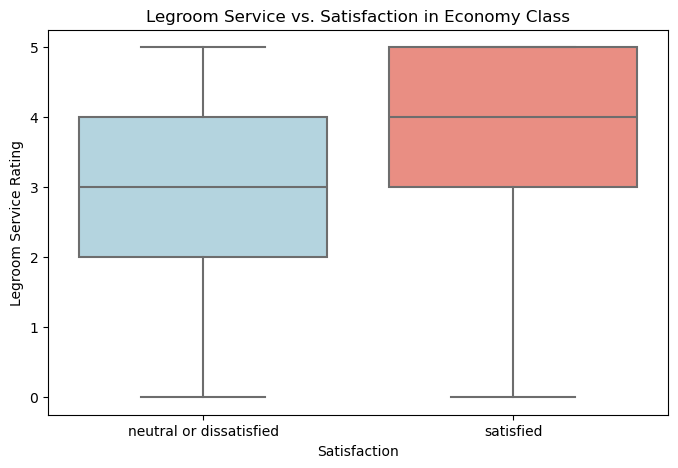

In [42]:
# Plot Legroom Service vs. Satisfaction
plt.figure(figsize=(8,5))
sns.boxplot(x="satisfaction", y="Leg room service", data=train_df, palette=["lightblue", "salmon"])
plt.title("Legroom Service vs. Satisfaction in Economy Class")
plt.ylabel("Legroom Service Rating")plt.xlabel("Satisfaction")
plt.show()

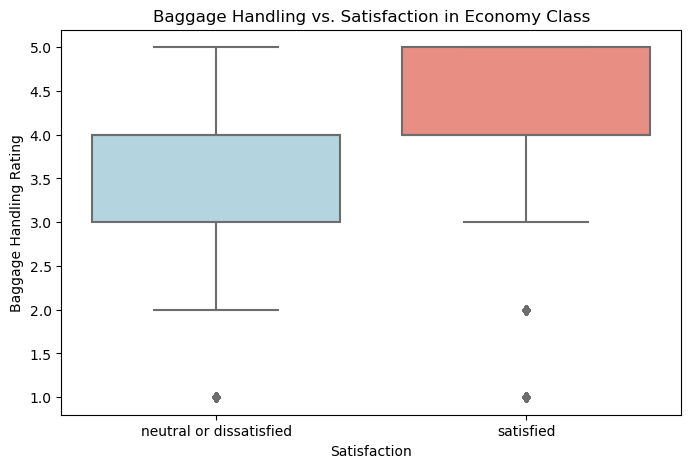

In [44]:
# Plot Baggage Handling vs. Satisfaction
plt.figure(figsize=(8,5))
sns.boxplot(x="satisfaction", y="Baggage handling", data=train_df, palette=["lightblue", "salmon"])
plt.title("Baggage Handling vs. Satisfaction in Economy Class")
plt.ylabel("Baggage Handling Rating")
plt.xlabel("Satisfaction")
plt.show()

# Key Observations: Baggage Handling & Satisfaction (Economy Class)
# 📊 What the Graph Tells Us:
✔ Baggage Handling Ratings Distribution:

- Ratings range from 1 to 5, with distinct trends in satisfied vs. dissatisfied passengers.

✔ Dissatisfied Group:

- Median rating ~3.5, indicating moderate satisfaction.

- Lower quartile around 3, upper quartile near 4, showing that most dissatisfied passengers still gave a neutral-to-positive rating.

- Some extreme cases rated baggage handling 1, signaling poor service for a subset of passengers.

✔ Satisfied Group:

- Median rating ~4.5, demonstrating stronger satisfaction with baggage handling.

- Lower quartile at 4, upper quartile at 5, suggesting consistently high ratings.

- A few outliers still rated baggage handling as 1 or 2, indicating that even satisfied passengers occasionally had baggage-related issues.

# 🛫 What Action Airlines Can Take:
✅ Baggage handling is generally rated higher by satisfied passengers, suggesting it plays a role in overall customer experience but is not always a deal-breaker for dissatisfaction. Airlines should:

- Maintain high baggage service standards to keep satisfied passengers happy.

- Offer compensation (vouchers, discounts) for passengers with lost or delayed baggage to prevent dissatisfaction.

✅ Most dissatisfied passengers still rate baggage handling 3 or above, meaning other factors (e.g., seating comfort, flight delays) are likely bigger contributors to dissatisfaction. Airlines can:

- Investigate correlations between baggage ratings and other complaints to identify root causes of dissatisfaction.

- Improve baggage tracking and communication during delays to mitigate potential frustration.

✅ Even satisfied passengers sometimes face baggage issues. Since a few passengers rated baggage handling poorly but were still satisfied overall, airlines should:

- Implement automated baggage tracking notifications to reduce anxiety.

- Enhance customer service responsiveness for baggage claims to improve recovery times and reduce complaints.

### By focusing on consistent baggage service, transparent communication, and proactive issue resolution, airlines can minimize dissatisfaction while strengthening the satisfaction of already happy customers. 🚀

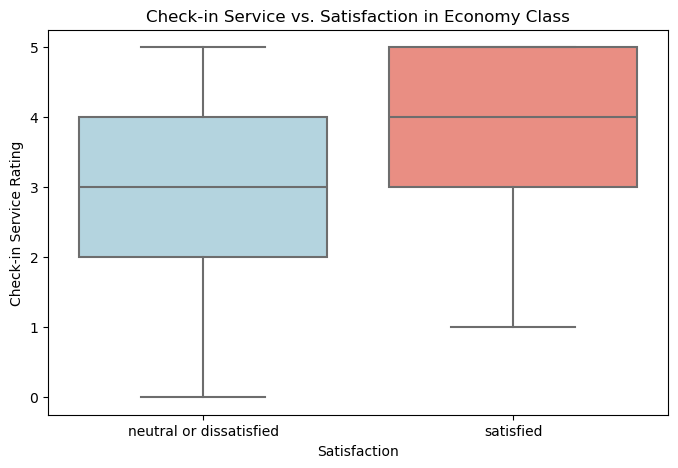

In [48]:
# Cleanliness vs. Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x="satisfaction", y="Checkin service", data=train_df, palette=["lightblue", "salmon"])
plt.title("Check-in Service vs. Satisfaction in Economy Class")
plt.ylabel("Check-in Service Rating")
plt.xlabel("Satisfaction")
plt.show()

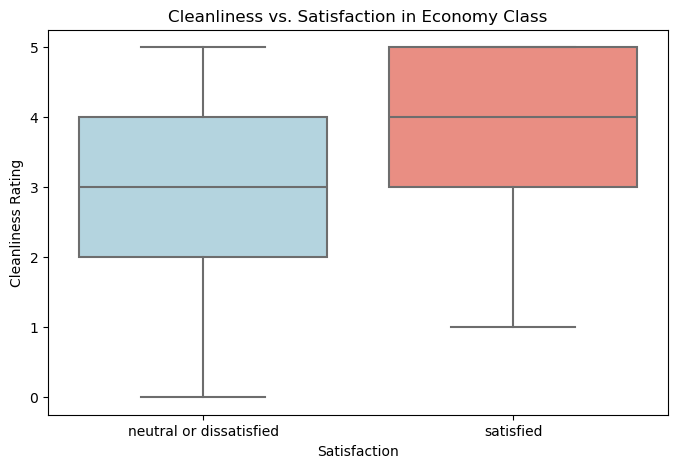

In [52]:
# Cleanliness vs. Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x="satisfaction", y="Cleanliness", data=train_df, palette=["lightblue", "salmon"])
plt.title("Cleanliness vs. Satisfaction in Economy Class")
plt.ylabel("Cleanliness Rating")
plt.xlabel("Satisfaction")
plt.show()

# Insights from Cleanliness vs. Satisfaction Analysis 🚀
### Higher Ratings for Satisfied Passengers

- Passengers who reported satisfaction tend to give higher cleanliness ratings, mostly between 3 and 5, with the median around 4.

- In contrast, dissatisfied passengers have lower ratings, mostly between 2 and 4, with a median of 3.

### Clear Distinction in Perception

- There is a noticeable difference in how cleanliness is perceived between satisfied and dissatisfied passengers.

- Satisfied passengers rarely rate cleanliness below 2, whereas dissatisfied passengers show more variance, including ratings as low as 0.

### Impact on Customer Experience

- Cleanliness plays a significant role in overall passenger satisfaction.

- Airlines should prioritize hygiene and cleanliness improvements to enhance customer experience, particularly among those giving low ratings.

#  Compare Economy vs. Economy Plus

In [62]:
df_filtered = train_df[train_df['Class'].isin(['Eco', 'Eco Plus'])]

In [63]:
features = [
    "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]

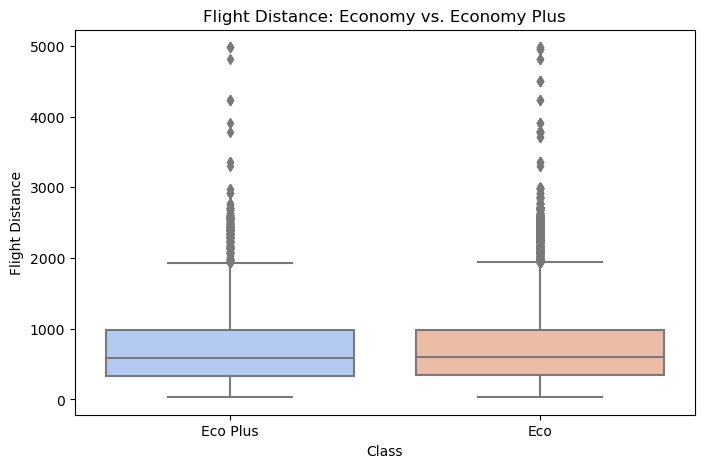

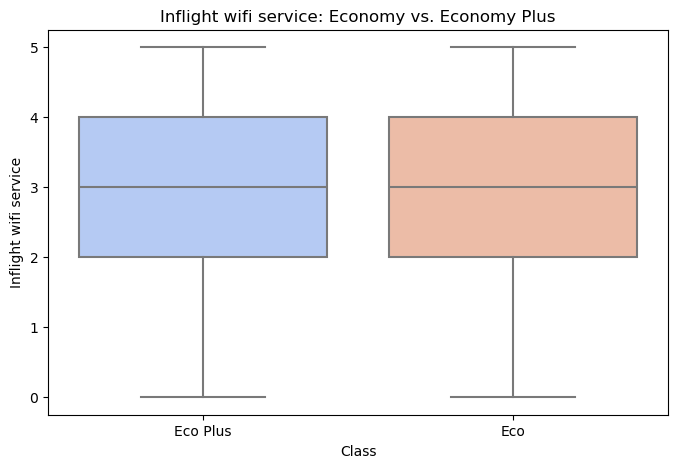

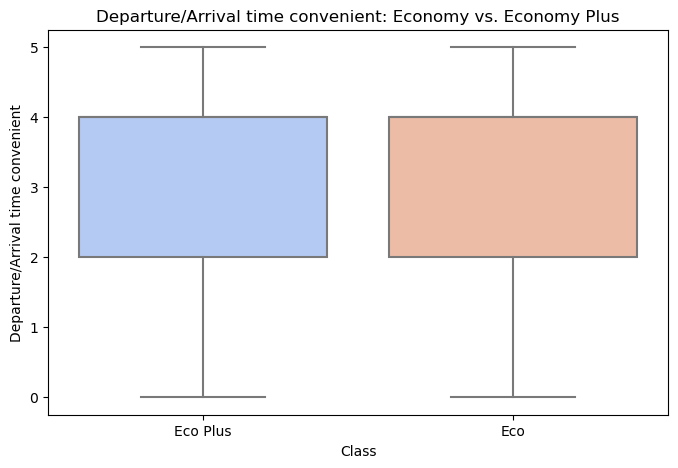

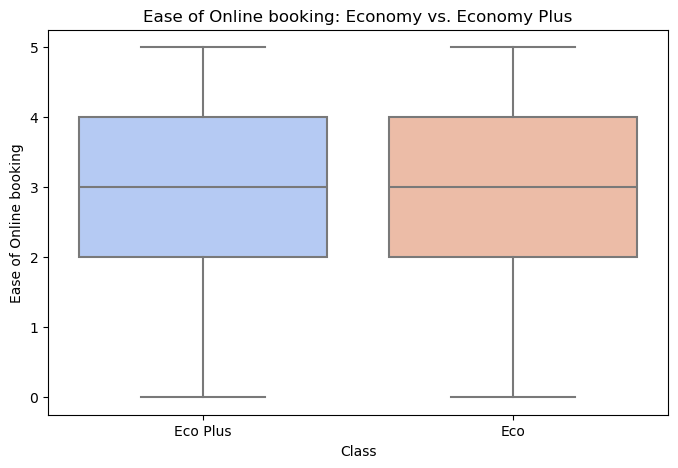

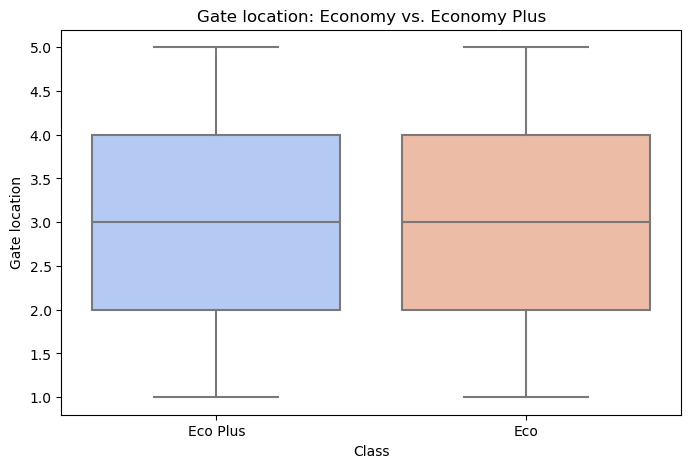

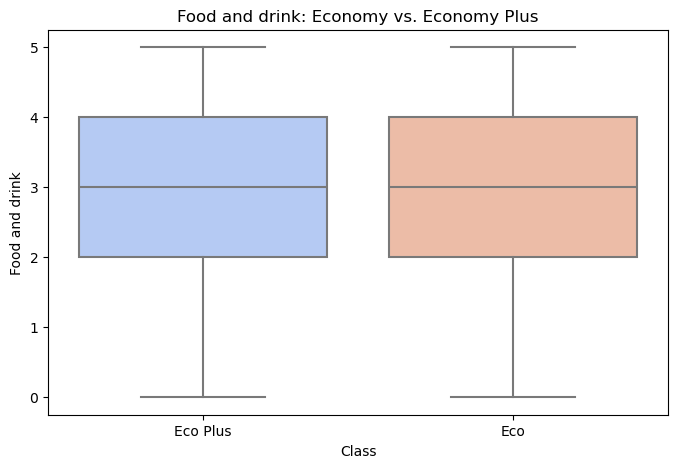

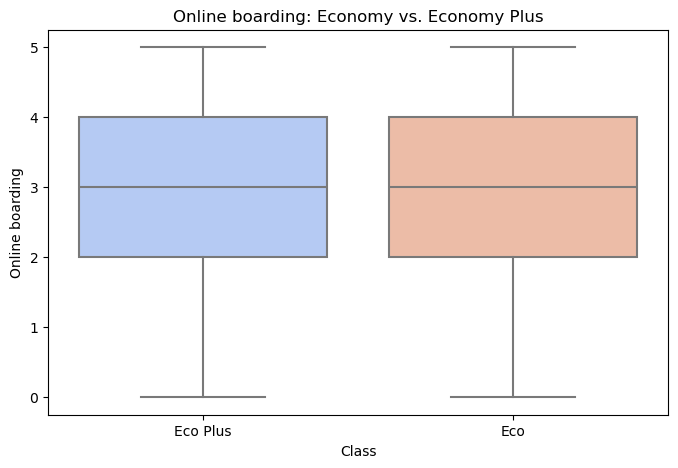

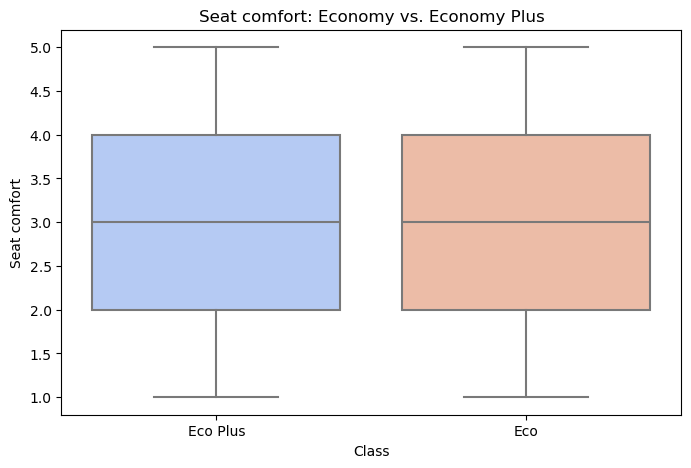

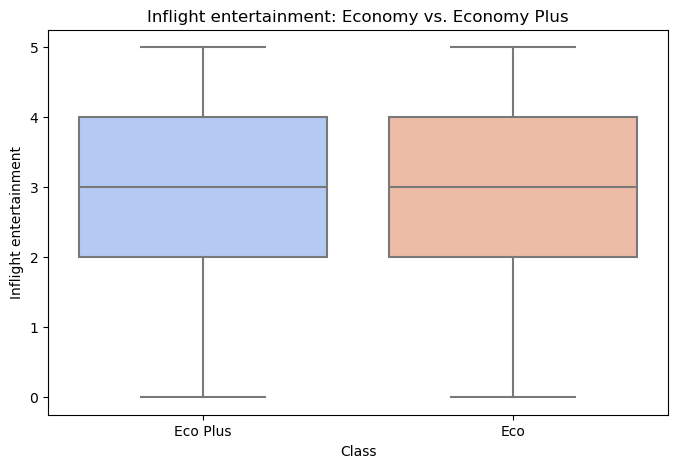

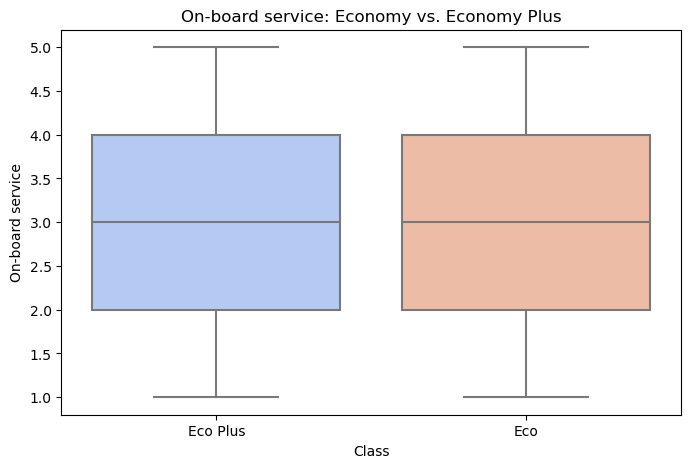

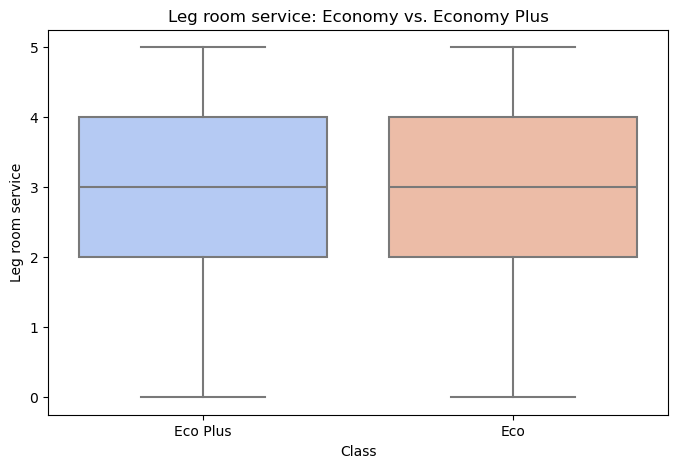

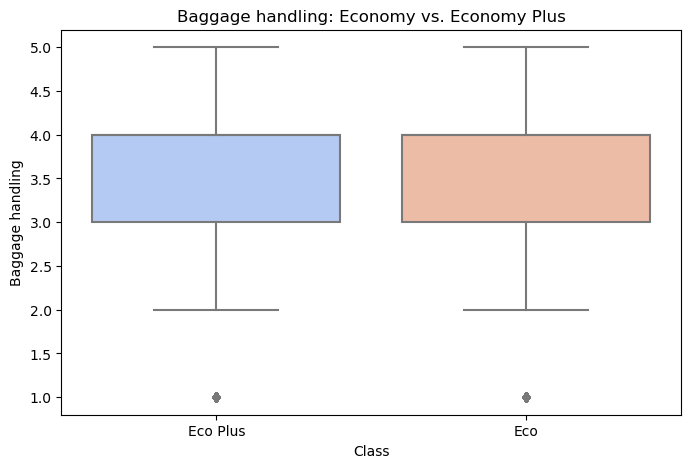

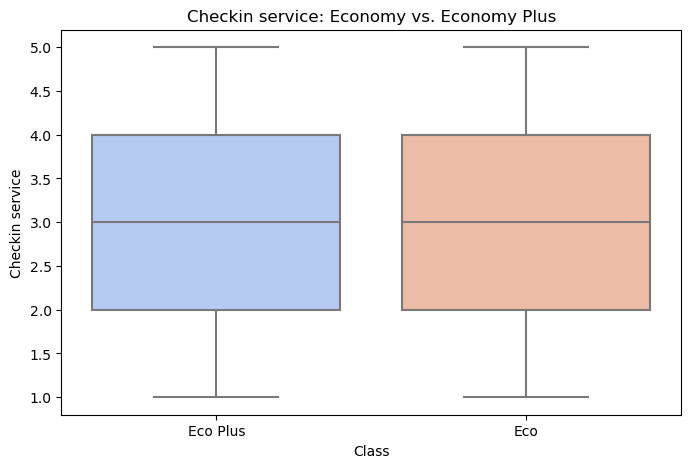

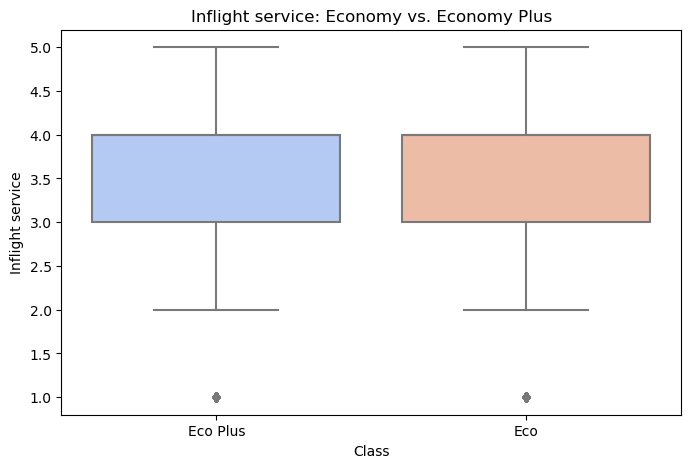

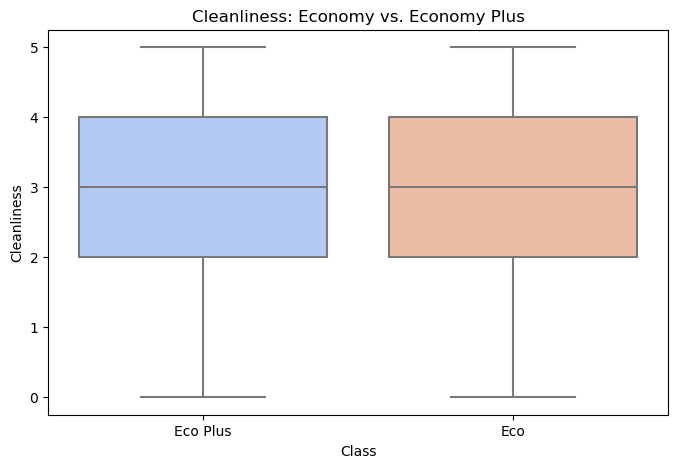

In [64]:
# Plot boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Class", y=feature, data=df_filtered, palette="coolwarm")
    plt.title(f"{feature}: Economy vs. Economy Plus")
    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.show()

# Insights from Baggage Handling: Economy vs. Economy Plus
## 📊 What the Graph Tells Us:
✔ Similar Ratings Across Classes: Both Economy and Economy Plus have nearly identical distributions, with median ratings around 4. This suggests that passengers in both classes perceive baggage handling similarly.

✔ Minor Presence of Outliers: Both classes have a few low-rated outliers (rating of 1), indicating occasional dissatisfaction with baggage handling.

✔ Consistent Performance: The interquartile range (middle 50% of data) is nearly the same for both classes, showing little variation in passenger experiences.

# 🛫 What Action Airlines Can Take:
- Since baggage handling ratings are comparable, airlines might not need to differentiate baggage services significantly between Economy and Economy Plus.

#### However, addressing occasional negative experiences (outliers) can further improve service consistency and reduce dissatisfaction. Airlines could do this by:

   - Enhancing baggage tracking and handling processes.

   - Providing better communication in case of baggage delays.

   - Investigating complaints from low-rated experiences to identify key pain points.service consistency.

# --------------------------------------------------------------------------

# Insights from Inflight Service: Economy vs. Economy Plus
## 📊 What the Graph Tells Us:
✔ Similar Ratings Across Classes: Both Economy and Economy Plus have nearly identical distributions, with median ratings around 4, indicating overall positive passenger feedback.

✔ Presence of Low Outliers: Both classes have a few outliers at rating 1, meaning some passengers had a very poor experience with inflight service.

✔ Service Consistency: The interquartile range (IQR) is similar, meaning passenger experiences in both classes are quite comparable. The whiskers show that most ratings fall within 2 to 5, reinforcing that the majority of passengers had a decent experience.

# 🛫 What Action Airlines Can Take:
- Since inflight service ratings for Economy and Economy Plus are nearly identical, there is no major perceived advantage of Economy Plus over Economy in terms of service.

### To improve overall customer satisfaction, airlines should focus on enhancing service quality for the small percentage of passengers who reported poor experiences (outliers) by:

- Training flight attendants to handle customer concerns proactively.

- Offering small perks (such as extra refreshments) to improve service perception.

- Gathering passenger feedback to pinpoint recurring issues and addressing them strategically.

- By improving service for the lowest-rated experiences, airlines can boost satisfaction without needing to over-invest in service differentiation between Economy and Economy Plus. 🚀

In [67]:
import pandas as pd
import scipy.stats as stats

## 1️⃣ A/B Testing: Economy vs. Economy Plus Satisfaction

In [79]:
# Convert categorical satisfaction to numerical values
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
train_df['satisfaction_numeric'] = train_df['satisfaction'].map(satisfaction_mapping)


In [86]:
print(train_df['Class'].unique())



['Eco Plus' 'Business' 'Eco']


In [80]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay Bin,Arrival Delay Bin,satisfaction_numeric
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,0-30,0-30,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0-30,0-30,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,NaN,NaN,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0-30,0-30,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,4,2,3,2,3,0.0,neutral or dissatisfied,0-30,NaN,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,4,0,0.0,satisfied,NaN,NaN,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,5,5,4,7,14.0,neutral or dissatisfied,0-30,0-30,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,5,4,1,0,0.0,neutral or dissatisfied,NaN,NaN,0


In [87]:
satisfaction_economy = train_df[train_df['Class'] == 'Eco']['satisfaction_numeric']
satisfaction_economy_plus = train_df[train_df['Class'] == 'Eco Plus']['satisfaction_numeric']


In [88]:
satisfaction_economy

5         0
6         0
9         0
10        0
12        0
         ..
103895    0
103896    0
103898    0
103899    0
103902    0
Name: satisfaction_numeric, Length: 46745, dtype: int64

In [89]:
satisfaction_economy_plus

0         0
11        0
27        1
37        0
69        1
         ..
103811    0
103867    0
103868    0
103877    1
103890    1
Name: satisfaction_numeric, Length: 7494, dtype: int64

In [90]:
# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(satisfaction_economy, satisfaction_economy_plus, equal_var=False)


In [91]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(satisfaction_economy, satisfaction_economy_plus, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -11.325051389500805, P-value: 1.520837787883964e-29


# Interpretation of Your T-Test Results
#### T-statistic: -11.33
#### P-value: 1.52e-29 (which is essentially 0, much lower than 0.05)

# Key Takeaways:
#### ✅ Since p-value < 0.05, we reject the null hypothesis.
#### ✅ There is a significant difference in satisfaction between Economy and Economy Plus passengers.
#### ✅ The negative T-statistic (-11.33) indicates that Economy passengers have significantly lower satisfaction compared to Economy Plus passengers.

# --------------------------------------------------------------------------------------

## Business Insight:
#### 📌 Economy class passengers are significantly less satisfied than Economy Plus passengers.
#### 📌 Recommendation: To improve Economy class satisfaction, the airline should enhance comfort, inflight service, or additional perks for Economy passengers.
#### 📌 Possible Actions: Offering better seating, improved food quality, or better baggage handling could help reduce the satisfaction gap.